<a href="https://colab.research.google.com/github/data-RanDan/new_pro/blob/main/N_data_exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#connect to colab

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# installs

# imports

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import gc
import sys
import warnings
warnings.filterwarnings("ignore")

# Utils

In [2]:
def merge_dfs(df_ls, merge_on, how="inner",prefix=True):
    """
    df_ls: list : list of df to merge 
    merge_on: list : list of columns to merge on
    prefix: default = True : add prefix if column names are duplicated
    return: df : merged_df on a copy of the 1st df
    """
    n = len(df_ls)
    print(f"Merging {n} dfs:")
    for i, df in enumerate(df_ls):
        print(f"\t{n-i} to go")
        if prefix:
            merge_cols = df[merge_on].copy()
            df = df.drop(columns=merge_on).add_prefix(f"ict{i}_")
            df = pd.concat((merge_cols, df), axis=1)
        if i == 0:
            full_df = df.copy()
        else:
            full_df = full_df.merge(df, on=merge_on, how=how)
    print('Done: ',full_df.shape )
    print( "Total df memory: {:.2f} gb".format((full_df.memory_usage()/1e9).sum() ) )
    return full_df

In [3]:
from functools import reduce

def find_intersect(df_ls,col):
    df0,df1,df2 = df_ls
    ict0_idx = df0[col].values
    ict1_idx =df1[col].values
    ict2_idx = df2[col].values
    intersect_idx = reduce( np.intersect1d,[ict0_idx,ict1_idx,ict2_idx])
    return intersect_idx#,intersect_val


In [4]:
def my_normlaize(x):
    return (x-x.mean())/x.std()

# Note: The dataset is too large in terms of features we will be using the dataset in form of chunks in the entire solution

# Load data

max_row

In [5]:
# LOAD INDEVIDUAL DATASETS
max_rows=1e7
ict0 = pd.read_csv('/content/drive/MyDrive/Nvidia_project/data/IC_T0_DATA.csv.gz')#,nrows=max_rows)#,header=None)#, nrows=10000)
ict1 = pd.read_csv('/content/drive/MyDrive/Nvidia_project/data/IC_T1_DATA.csv.gz')#,nrows=max_rows)#,header=None)#, nrows=10000)
ict2 = pd.read_csv('/content/drive/MyDrive/Nvidia_project/data/IC_T2_DATA.csv.gz')#,nrows=max_rows)#,header=0)#, nrows=10000)
target_sys = pd.read_csv('/content/drive/MyDrive/Nvidia_project/data/SYSTEM_TARGET_DATA.csv.gz')#,header=0)#, nrows=10000)


In [11]:
ict0,ict1,ict2 = None, None, None

In [6]:
full_df = pd.read_csv('/content/drive/MyDrive/Nvidia_project/data/IC_T0_DATA.csv.gz',nrows=max_rows)

In [7]:
target_sys.head()

,SN,IC,RX_PORT,TX_PORT,RX_GROUP,TX_GROUP,CM
0,140109932420X65,1284_0__94M9S,40020,409339,RA,TA,F
1,140108932474X65,14P1_7514_8_H0R,53362,339225,RA,TA,F
2,140104922451X65,1385_04_1_1M9S,122430,4361227,RA,TC,F
3,140103922452X65,1487_004_1_2M9S,135881,946983,RA,TB,F
4,140102922452X65,1487_105_1_2M9S,231003,1291372,RA,TB,F


In [8]:
full_df.head()

,IC,BIN,X,Y,1249085,1249706,1215243,1215244,1215245,1215246,1215247,1215248,1215249,1287499,1281259,1287500,1281260,1287501,1281261,1281262,1281263,1281264,1281265,1281266,1287502,1281271,1265132,1287503,1281272,1281273,1287504,1265134,1287505,1281274,1265137,1287506,1265138,1287507,1287508,1287509,...,1288286,1288287,1288288,1288289,1288290,1249577,1288291,1288292,1288293,1288294,1249557,1216323,1216324,1288295,1288296,1288297,1288298,1288299,1288300,1288301,1288302,1288303,1288304,1288305,1288306,1288307,1288308,1288309,1288310,1288311,1288312,1288313,1288314,1386894,1386895,1264526,1288427,1216387,1318029,1249586
0,1384_0__012M9S,20,0,12,08/21/2020 4:15:52 PM,PS8M90-04E6,0,1,4,12,0,12,6,1,0.000241,1,0.000131,1,0.000416,0.000390,0.000411,0.000412,0.000409,0.000408,1,0.000113,0.000231,1,-0.000009,-0.000016,1,0.000515,1,0.000135,0.000124,1,0.000117,1,-0.000002,0.000002,...,22443900000,18404200000,22530900000,14971800000,20000600000,528,22617900000,18565000000,22690600000,15011700000,-1,0,0,0.139120,-0.000012,0.002496,0.000921,0.001474,-0.000030,0.000013,0.000063,0.001203,0.008727,0.003091,0.001971,0.001818,0.001661,0.001909,0.001877,0.001472,0.000224,0.000477,0.000470,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:16:54 PM
1,1384_0__013M9S,20,0,13,08/21/2020 4:16:55 PM,PS8M90-04E6,0,1,4,13,0,13,7,1,0.000228,1,0.000139,1,0.000425,0.000433,0.000418,0.000438,0.000434,0.000436,1,0.000070,0.000240,1,-0.000040,0.000025,1,0.000536,1,0.000151,0.000149,1,0.000098,1,0.000004,-0.000009,...,22440800000,18400100000,22529900000,14949300000,20000600000,528,22591300000,18575200000,22666100000,14991200000,-1,0,0,0.113142,-0.000382,0.002620,0.000469,0.001453,-0.000016,-0.000013,0.000017,0.001172,0.008621,0.003180,0.001864,0.001940,0.001671,0.001634,0.001793,0.001859,0.000252,0.000584,0.000345,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:17:57 PM
2,1384_00_1_1M9S,16,10,1,08/21/2020 4:55:22 PM,PS8M90-04E6,0,1,4,11,10,1,7,1,0.000244,1,0.000141,1,0.000429,0.000429,0.000393,0.000380,0.000395,0.000363,1,0.000130,0.000235,1,0.000030,0.000015,1,0.000575,1,0.000158,0.000138,1,0.000072,1,0.000004,0.000038,...,22586200000,18460500000,22655800000,14955400000,20000600000,530,22613800000,18553700000,22684500000,14968700000,-1,0,0,0.133193,0.000198,0.002192,0.000575,0.001180,0.000037,-0.000019,-0.000004,0.001146,0.008588,0.003128,0.001703,0.001958,0.001788,0.001933,0.001892,0.001965,0.000308,0.000482,0.000514,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:56:22 PM
3,1484_100_1_1M9S,16,10,11,08/21/2020 4:40:56 PM,PS8M90-04E6,0,1,4,21,10,11,1,1,0.000202,1,0.000079,1,0.000308,0.000327,0.000298,0.000322,0.000341,0.000333,1,0.000108,0.000208,1,0.000021,0.000024,1,0.000509,1,0.000120,0.000131,1,0.000086,1,0.000019,-0.000008,...,22785900000,18351000000,22864700000,15019900000,20000600000,534,22825800000,18400100000,22892400000,15010700000,-1,0,0,0.179965,0.000062,0.002372,0.000952,0.002234,-0.000010,-0.000003,0.000065,0.001419,0.008602,0.003164,0.001807,0.001990,0.001719,0.001848,0.001803,0.001874,0.000317,0.000637,0.000246,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:41:40 PM
4,1484_200_1_1M9S,16,10,12,08/21/2020 6:21:30 PM,PS8M90-04E6,0,1,4,22,10,12,0,1,0.000215,1,0.000091,1,0.000297,0.000317,0.000331,0.000329,0.000328,0.000321,1,0.000127,0.000203,1,0.000014,0.000016,1,0.000535,1,0.000139,0.000141,1,0.000035,1,-0.000015,0.000038,...,22730600000,18404200000,22802200000,14986100000,19999600000,534,22739800000,18495300000,22819700000,14992300000,-1,0,0,0.184753,-0.000175,0.002316,0.000867,0.002337,0.000027,-0.000059,0.000019,0.001293,0.008621,0.003059,0.001820,0.001851,0.001912,0.001653,0.001785,0.001589,0.000378,0.000413,0.000425,P,-1.0,1.0,1,-1,0.0,08/21/2020 6:22:06 PM


In [22]:
ict0.head()
ict1.head()
ict2.head()

target_sys.head()

,SN,IC,RX_PORT,TX_PORT,RX_GROUP,TX_GROUP,CM
0,140109932420X65,1284_0__94M9S,40020,409339,RA,TA,F
1,140108932474X65,14P1_7514_8_H0R,53362,339225,RA,TA,F
2,140104922451X65,1385_04_1_1M9S,122430,4361227,RA,TC,F
3,140103922452X65,1487_004_1_2M9S,135881,946983,RA,TB,F
4,140102922452X65,1487_105_1_2M9S,231003,1291372,RA,TB,F


# intersecting

In [23]:
df_ls = [ict0,ict1,ict2]

In [24]:
intersect_idx = find_intersect(df_ls,col='Y')
intersect_idx.size

23

# merge df

In [ ]:
#merging ict dfs
full_df = merge_dfs(df_ls=[ict0,ict1,ict2], merge_on=['IC',"X","Y"])
ict0,ict1,ict2 = None, None, None
full_df.shape


Merging 3 dfs:
	3 to go
	2 to go


In [9]:
#merging target_df
full_df = merge_dfs(df_ls=[target_sys,full_df], merge_on=['IC'],prefix=False)
target_sys = None

Merging 2 dfs:
	2 to go
	1 to go
Done:  (46002, 1540)
Total df memory: 0.57 gb


In [10]:
full_df.head()

,SN,IC,RX_PORT,TX_PORT,RX_GROUP,TX_GROUP,CM,BIN,X,Y,1249085,1249706,1215243,1215244,1215245,1215246,1215247,1215248,1215249,1287499,1281259,1287500,1281260,1287501,1281261,1281262,1281263,1281264,1281265,1281266,1287502,1281271,1265132,1287503,1281272,1281273,1287504,1265134,1287505,1281274,...,1288286,1288287,1288288,1288289,1288290,1249577,1288291,1288292,1288293,1288294,1249557,1216323,1216324,1288295,1288296,1288297,1288298,1288299,1288300,1288301,1288302,1288303,1288304,1288305,1288306,1288307,1288308,1288309,1288310,1288311,1288312,1288313,1288314,1386894,1386895,1264526,1288427,1216387,1318029,1249586
0,140109932420X65,1284_0__94M9S,40020,409339,RA,TA,F,16,9,4,08/21/2020 4:51:56 PM,PS8M90-04E6,0,1,4,13,9,4,7,1,0.000188,1,0.000094,1,0.000317,0.000318,0.000312,0.000299,0.000314,0.000309,1,0.000048,0.000186,1,-0.000009,0.000014,1,0.000525,1,0.000117,...,22548300000,18331500000,22623100000,14836600000,20000600000,535,22648700000,18382700000,22714200000,14848900000,-1,0,0,0.209261,-0.000135,0.002125,0.001066,0.002036,0.000017,-0.000050,-0.000034,0.001175,0.008705,0.003025,0.002070,0.001841,0.001912,0.002013,0.002050,0.001966,0.000502,0.000670,0.000284,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:52:38 PM
1,140108932474X65,14P1_7514_8_H0R,53362,339225,RA,TA,F,16,18,7,08/19/2020 10:10:10 AM,PRPH05-14C4,0,1,14,25,18,7,7,1,0.000192,1,0.000075,1,0.000301,0.000300,0.000319,0.000323,0.000323,0.000310,1,0.000106,0.000194,1,0.000038,-0.000006,1,0.000490,1,0.000112,...,22765400000,18570100000,22833000000,14988200000,20000600000,514,22804300000,18673500000,22876000000,15004600000,-1,0,0,0.234009,-0.000063,0.002621,0.001094,0.002305,0.000017,0.000003,0.000012,0.001223,0.008668,0.003039,0.002056,0.002120,0.001851,0.002026,0.001999,0.001734,0.000423,0.000571,0.000121,P,-1.0,1.0,1,-1,0.0,08/19/2020 10:10:57 AM
2,140104922451X65,1385_04_1_1M9S,122430,4361227,RA,TC,F,15,14,1,08/21/2020 7:54:25 PM,PS8M90-05E1,0,1,5,15,14,1,1,1,0.000225,1,0.000127,1,0.000378,0.000387,0.000379,0.000357,0.000351,0.000366,1,0.000096,0.000230,1,-0.000029,-0.000033,1,0.000579,1,0.000136,...,22465400000,18523000000,22544200000,14955400000,20000600000,536,22523700000,18584400000,22600500000,14955400000,-1,0,0,0.097101,0.000323,0.002316,0.000481,0.001111,0.000012,-0.000010,0.000041,0.001260,0.009005,0.003187,0.001830,0.001918,0.002012,0.001829,0.001755,0.001765,0.000323,0.000431,-0.000017,P,-1.0,1.0,1,-1,0.0,08/21/2020 7:55:29 PM
3,140103922452X65,1487_004_1_2M9S,135881,946983,RA,TB,F,16,14,20,08/22/2020 3:43:18 AM,PS8M90-07C7,0,1,7,34,14,20,3,1,0.000215,1,0.000092,1,0.000320,0.000322,0.000329,0.000320,0.000317,0.000317,1,0.000091,0.000189,1,0.000010,0.000017,1,0.000568,1,0.000115,...,22551400000,18495300000,22634300000,14998400000,20000600000,525,22652700000,18537300000,22719300000,15007600000,-1,0,0,0.165098,-0.000012,0.002620,0.001081,0.002290,0.000020,0.000007,-0.000016,0.001361,0.008753,0.002789,0.001419,0.002167,0.001714,0.001797,0.001864,0.001770,0.000666,0.000362,0.000030,P,-1.0,1.0,1,-1,0.0,08/22/2020 3:44:20 AM
4,140102922452X65,1487_105_1_2M9S,231003,1291372,RA,TB,F,15,15,21,08/22/2020 3:48:04 AM,PS8M90-07C7,0,1,7,36,15,21,5,1,0.000208,1,0.000088,1,0.000317,0.000309,0.000320,0.000344,0.000330,0.000327,1,0.000112,0.000208,1,0.000003,0.000027,1,0.000526,1,0.000133,...,22486900000,18397000000,22568800000,15011700000,20000600000,539,22577000000,18503500000,22650700000,15052700000,-1,0,0,0.100152,-0.000012,0.002372,0.000909,0.001746,-0.000029,-0.000021,-0.000002,0.001376,0.008552,0.003005,0.001882,0.001785,0.001849,0.001553,0.002027,0.001755,0.000259,0.000446,0.000111,P,-1.0,1.0,1,-1,0.0,08/22/2020 3:48:36 AM


In [12]:
#merging target_df
# full_df = merge_dfs(df_ls=[target_sys,full_df], merge_on=['IC'],prefix=False)
# target_sys = None

# print(full_df.shape)
# print( "Total df memory: {:.2f} gb".format((full_df.memory_usage()/1e9).sum() ) )

drive_path = r"/content/drive/MyDrive/Nvidia_project/data/full_data.csv.gz"
## SAVEING NEW DF WILL TAKE ~20 MINUTS
full_df.to_csv(drive_path,compression="gzip",index=False) # USE compression="gzip" to zip

# drive_path = r"/content/drive/MyDrive/Nvidia_project/data/full_data.csv.gz"

In [29]:
drive_path = r"/content/drive/MyDrive/Nvidia_project/data/full_data.csv.gz"
## SAVEING NEW DF WILL TAKE ~20 MINUTS
full_df.to_csv(drive_path,compression="gzip",index=False) # 

In [31]:
gf = pd.read_csv(drive_path)

In [32]:
gf.shape

(48995, 5567)

49


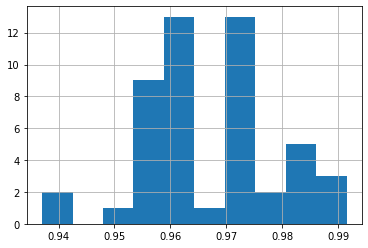

In [ ]:
                          #find na cols
na_cols = full_df.isna().mean()
na_cols = na_cols[na_cols>.9]
print(na_cols.count())
na_cols.hist()


In [ ]:
na_cols_df = pd.DataFrame(
                    np.column_stack((na_cols.index.values,
                                     na_cols.values)),
                    columns = ['f_name','na_percent']   )

na_cols_df.to_csv(r'/content/drive/MyDrive/Nvidia_project/data/na_columns.csv',index=False) 
na_cols_df.head()   

,f_name,na_percent
0,ict0_1417033,0.963792
1,ict0_1417034,0.963813
2,ict0_1264533,0.954771
3,ict0_1264534,0.954771
4,ict0_1264535,0.954771


# EDA

### target_sys 

In [ ]:
target_sys.shape

AttributeError: ignored

In [ ]:
target_sys.info()

In [ ]:
target_sys.head()

In [ ]:
target_sys.isna().sum()


SN          0
IC          0
RX_PORT     0
TX_PORT     0
RX_GROUP    0
TX_GROUP    0
CM          0
dtype: int64

In [ ]:
target_sys.duplicated().sum()

0

In [ ]:
target_sys.describe()

,RX_PORT,TX_PORT
count,4.782600e+04,4.782600e+04
mean,3.609302e+05,5.922359e+05
std,1.651981e+06,4.589191e+06
min,1.087000e+03,8.600000e+01
25%,4.303325e+04,3.375325e+04
50%,9.940400e+04,1.144420e+05
75%,2.381912e+05,4.764410e+05
max,1.315889e+08,9.594730e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51b83d0150>,
      dtype=object)

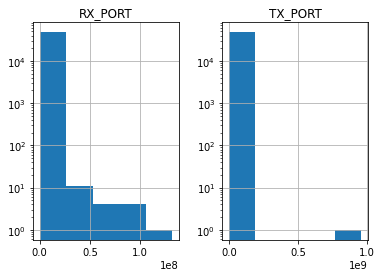

In [ ]:
target_sys.hist(bins=5,log=True)

In [ ]:
target_sys.columns

Index(['SN', 'IC', 'RX_PORT', 'TX_PORT', 'RX_GROUP', 'TX_GROUP', 'CM'], dtype='object')

F    0.509597
U    0.490403
Name: CM, dtype: float64


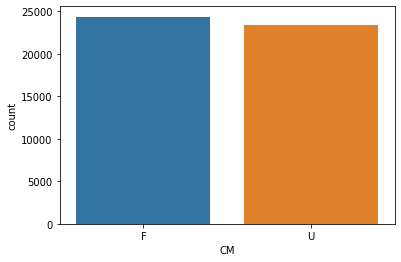

In [ ]:
print(target_sys['CM'].value_counts(normalize=True))
sns.countplot(target_sys['CM'])

RA    0.872726
RB    0.095806
RC    0.031468
Name: RX_GROUP, dtype: float64


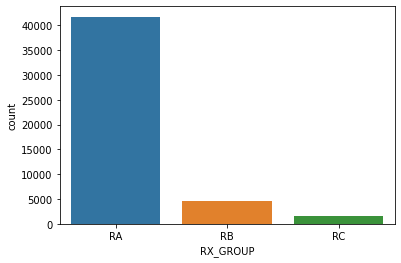

In [ ]:
print(target_sys['RX_GROUP'].value_counts(normalize=True))
sns.countplot(target_sys['RX_GROUP'])

TA    0.756910
TB    0.171141
TC    0.071948
Name: TX_GROUP, dtype: float64


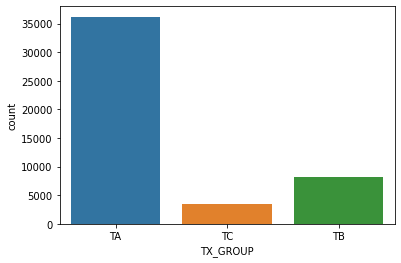

In [ ]:
print(target_sys['TX_GROUP'].value_counts(normalize=True))
sns.countplot(target_sys['TX_GROUP'])

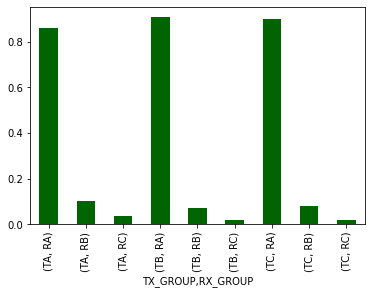

In [ ]:
target_sys.groupby('TX_GROUP')['RX_GROUP'].value_counts(normalize=True).plot.bar(color='forestgreen')

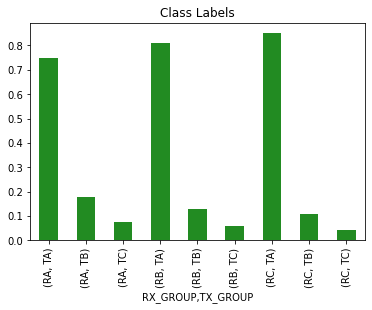

In [ ]:
target_sys.groupby('RX_GROUP')['TX_GROUP'].value_counts(normalize=True).plot.bar(color = 'forestgreen',title="Class Labels")

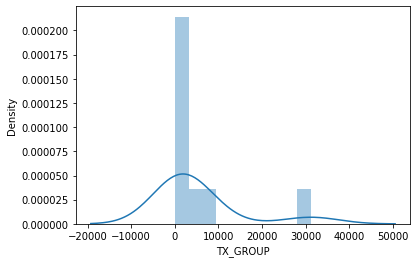

In [ ]:
sns.distplot(target_sys.groupby('RX_GROUP')['TX_GROUP'].value_counts())

In [ ]:
target_sys['IC'].value_counts()

12M8_9__74M3R       2
15M1_1923_11_M3R    2
13M1_96_1_6M3R      2
1333_48_1_1A6S      1
15H2_1913_14_A5R    1
                   ..
15P1_1529_81_H0R    1
13S5_49_1_4K1R      1
14P2_4563__1H0R     1
15P1_1518_02_H0R    1
1581_1028_20_M9S    1
Name: IC, Length: 47823, dtype: int64

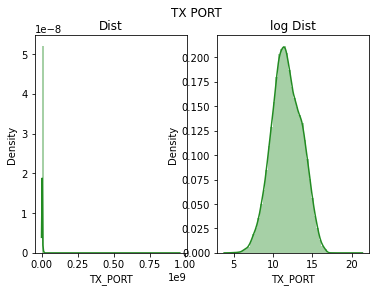

In [ ]:
#check dist

fig, ax =plt.subplots(1,2)
sns.distplot(target_sys['TX_PORT'], ax=ax[0],color = 'forestgreen').set_title("Dist")
sns.distplot(np.log(target_sys['TX_PORT']), ax=ax[1],color = 'forestgreen').set_title("log Dist")
# sns.distplot(my_normlaize(np.log(target_sys['TX_PORT'])), ax=ax[2]).set_title("Normalized Dist")
fig.suptitle('TX PORT')
fig.show()

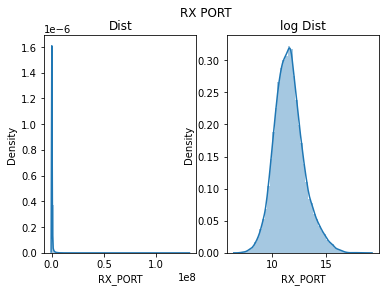

In [ ]:
#check dist
fig, ax =plt.subplots(1,2)
sns.distplot(target_sys['RX_PORT'], ax=ax[0]).set_title("Dist")
sns.distplot(np.log(target_sys['RX_PORT']), ax=ax[1]).set_title("log Dist")
fig.suptitle('RX PORT')
fig.show()


### FULL DF EDA

In [ ]:
full_df.head()

,SN,IC,RX_PORT,TX_PORT,RX_GROUP,TX_GROUP,CM,X,Y,ict0_BIN,ict0_1249085,ict0_1249706,ict0_1215243,ict0_1215244,ict0_1215245,ict0_1215246,ict0_1215247,ict0_1215248,ict0_1215249,ict0_1287499,ict0_1281259,ict0_1287500,ict0_1281260,ict0_1287501,ict0_1281261,ict0_1281262,ict0_1281263,ict0_1281264,ict0_1281265,ict0_1281266,ict0_1287502,ict0_1281271,ict0_1265132,ict0_1287503,ict0_1281272,ict0_1281273,ict0_1287504,ict0_1265134,ict0_1287505,ict0_1281274,...,ict2_1288295,ict2_1288296,ict2_1288297,ict2_1288298,ict2_1288299,ict2_1288300,ict2_1288301,ict2_1288302,ict2_1288303,ict2_1288304,ict2_1288305,ict2_1288306,ict2_1288307,ict2_1288308,ict2_1288309,ict2_1288310,ict2_1288311,ict2_1288312,ict2_1288313,ict2_1288314,ict2_1386894,ict2_1386895,ict2_1252251,ict2_1252252,ict2_1252253,ict2_1220257,ict2_1220258,ict2_1220259,ict2_1220260,ict2_1220261,ict2_1352728,ict2_1219183,ict2_1219184,ict2_1219185,ict2_1261989,ict2_1433135,ict2_1433136,ict2_1216387,ict2_1319095,ict2_1249586
0,140109932420X65,1284_0__94M9S,40020,409339,RA,TA,F,9,4,16,08/21/2020 4:51:56 PM,PS8M90-04E6,0,1,4,13,9,4,7,1,0.000188,1,0.000094,1,0.000317,0.000318,0.000312,0.000299,0.000314,0.000309,1,0.000048,0.000186,1,-0.000009,0.000014,1,0.000525,1,0.000117,...,0.275703,0.005288,0.002662,0.000797,0.001565,0.000005,-0.000005,-0.000032,0.001429,0.008853,0.002986,0.001891,0.002038,0.001872,0.001921,0.001920,0.001678,0.000441,0.000673,0.000190,P,-1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,11/09/2020 5:20:46 AM
1,140109932420X65,1284_0__94M9S,40020,409339,RA,TA,F,9,4,16,08/21/2020 4:51:56 PM,PS8M90-04E6,0,1,4,13,9,4,7,1,0.000188,1,0.000094,1,0.000317,0.000318,0.000312,0.000299,0.000314,0.000309,1,0.000048,0.000186,1,-0.000009,0.000014,1,0.000525,1,0.000117,...,0.275703,0.005288,0.002662,0.000797,0.001565,0.000005,-0.000005,-0.000032,0.001429,0.008853,0.002986,0.001891,0.002038,0.001872,0.001921,0.001920,0.001678,0.000441,0.000673,0.000190,P,-1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,11/09/2020 5:20:46 AM
2,140108932474X65,14P1_7514_8_H0R,53362,339225,RA,TA,F,18,7,16,08/19/2020 10:10:10 AM,PRPH05-14C4,0,1,14,25,18,7,7,1,0.000192,1,0.000075,1,0.000301,0.000300,0.000319,0.000323,0.000323,0.000310,1,0.000106,0.000194,1,0.000038,-0.000006,1,0.000490,1,0.000112,...,0.311919,0.007469,0.002621,0.000959,0.001910,-0.000008,0.000002,-0.000014,0.001314,0.008551,0.003142,0.001670,0.001862,0.001998,0.001929,0.002092,0.001837,0.000635,0.000305,0.000203,P,-1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,11/01/2020 3:19:41 PM
3,140104922451X65,1385_04_1_1M9S,122430,4361227,RA,TC,F,14,1,15,08/21/2020 7:54:25 PM,PS8M90-05E1,0,1,5,15,14,1,1,1,0.000225,1,0.000127,1,0.000378,0.000387,0.000379,0.000357,0.000351,0.000366,1,0.000096,0.000230,1,-0.000029,-0.000033,1,0.000579,1,0.000136,...,0.144691,-0.003441,0.002452,0.000186,0.001119,-0.000035,-0.000036,0.000011,0.001092,0.008877,0.003026,0.001832,0.002093,0.001862,0.001706,0.001818,0.001924,0.000388,0.000613,0.000247,P,-1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,11/10/2020 4:59:06 AM
4,140103922452X65,1487_004_1_2M9S,135881,946983,RA,TB,F,14,20,16,08/22/2020 3:43:18 AM,PS8M90-07C7,0,1,7,34,14,20,3,1,0.000215,1,0.000092,1,0.000320,0.000322,0.000329,0.000320,0.000317,0.000317,1,0.000091,0.000189,1,0.000010,0.000017,1,0.000568,1,0.000115,...,0.212042,-0.003441,0.001960,0.000943,0.001928,-0.000023,-0.000005,0.000011,0.001459,0.008733,0.002892,0.001972,0.001801,0.001839,0.001717,0.001884,0.001869,0.000347,0.000567,0.000092,P,-1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,11/10/2020 5:02:19 AM


In [ ]:
ccc = (full_df.RX_PORT-full_df.RX_PORT.min())/full_df.RX_PORT.max()


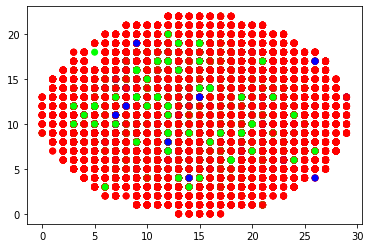

In [ ]:
plt.scatter(x=full_df.X, y=full_df.Y, c= pd.get_dummies(full_df.RX_GROUP).values)

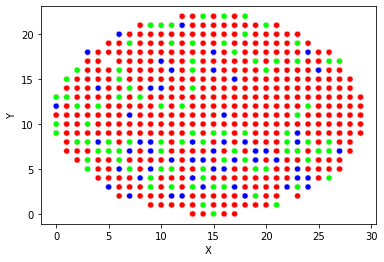

In [ ]:
sns.scatterplot(x=full_df.X, y=full_df.Y, c= pd.get_dummies(full_df.TX_GROUP).values)

In [ ]:
log_RX = np.log(full_df.RX_PORT)
log_RX = (log_RX-log_RX.min())/log_RX.max()

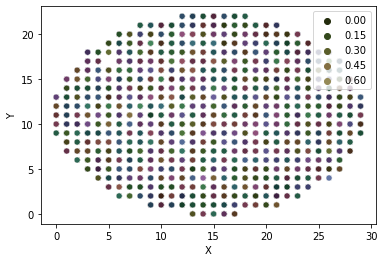

In [ ]:
sns.scatterplot(x=full_df.X, y=full_df.Y, hue=log_RX.values , palette="ch:start=2,rot=-.21,light=.55, reverse=1")

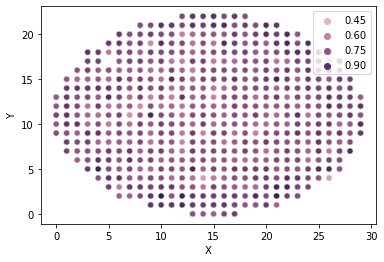

In [ ]:
sns.scatterplot(x=full_df.X, y=full_df.Y, hue=1-log_RX.values)

In [ ]:
ict0.head()


,IC,X,Y,t0_BIN,t0_1249085,t0_1249706,t0_1215243,t0_1215244,t0_1215245,t0_1215246,t0_1215247,t0_1215248,t0_1215249,t0_1287499,t0_1281259,t0_1287500,t0_1281260,t0_1287501,t0_1281261,t0_1281262,t0_1281263,t0_1281264,t0_1281265,t0_1281266,t0_1287502,t0_1281271,t0_1265132,t0_1287503,t0_1281272,t0_1281273,t0_1287504,t0_1265134,t0_1287505,t0_1281274,t0_1265137,t0_1287506,t0_1265138,t0_1287507,t0_1287508,t0_1287509,...,t0_1288286,t0_1288287,t0_1288288,t0_1288289,t0_1288290,t0_1249577,t0_1288291,t0_1288292,t0_1288293,t0_1288294,t0_1249557,t0_1216323,t0_1216324,t0_1288295,t0_1288296,t0_1288297,t0_1288298,t0_1288299,t0_1288300,t0_1288301,t0_1288302,t0_1288303,t0_1288304,t0_1288305,t0_1288306,t0_1288307,t0_1288308,t0_1288309,t0_1288310,t0_1288311,t0_1288312,t0_1288313,t0_1288314,t0_1386894,t0_1386895,t0_1264526,t0_1288427,t0_1216387,t0_1318029,t0_1249586
0,1384_0__012M9S,0,12,20,08/21/2020 4:15:52 PM,PS8M90-04E6,0,1,4,12,0,12,6,1,0.000241,1,0.000131,1,0.000416,0.000390,0.000411,0.000412,0.000409,0.000408,1,0.000113,0.000231,1,-0.000009,-0.000016,1,0.000515,1,0.000135,0.000124,1,0.000117,1,-0.000002,0.000002,...,22443900000,18404200000,22530900000,14971800000,20000600000,528,22617900000,18565000000,22690600000,15011700000,-1,0,0,0.139120,-0.000012,0.002496,0.000921,0.001474,-0.000030,0.000013,0.000063,0.001203,0.008727,0.003091,0.001971,0.001818,0.001661,0.001909,0.001877,0.001472,0.000224,0.000477,0.000470,P,-1,1,1,-1,0,08/21/2020 4:16:54 PM
1,1384_0__013M9S,0,13,20,08/21/2020 4:16:55 PM,PS8M90-04E6,0,1,4,13,0,13,7,1,0.000228,1,0.000139,1,0.000425,0.000433,0.000418,0.000438,0.000434,0.000436,1,0.000070,0.000240,1,-0.000040,0.000025,1,0.000536,1,0.000151,0.000149,1,0.000098,1,0.000004,-0.000009,...,22440800000,18400100000,22529900000,14949300000,20000600000,528,22591300000,18575200000,22666100000,14991200000,-1,0,0,0.113142,-0.000382,0.002620,0.000469,0.001453,-0.000016,-0.000013,0.000017,0.001172,0.008621,0.003180,0.001864,0.001940,0.001671,0.001634,0.001793,0.001859,0.000252,0.000584,0.000345,P,-1,1,1,-1,0,08/21/2020 4:17:57 PM
2,1384_00_1_1M9S,10,1,16,08/21/2020 4:55:22 PM,PS8M90-04E6,0,1,4,11,10,1,7,1,0.000244,1,0.000141,1,0.000429,0.000429,0.000393,0.000380,0.000395,0.000363,1,0.000130,0.000235,1,0.000030,0.000015,1,0.000575,1,0.000158,0.000138,1,0.000072,1,0.000004,0.000038,...,22586200000,18460500000,22655800000,14955400000,20000600000,530,22613800000,18553700000,22684500000,14968700000,-1,0,0,0.133193,0.000198,0.002192,0.000575,0.001180,0.000037,-0.000019,-0.000004,0.001146,0.008588,0.003128,0.001703,0.001958,0.001788,0.001933,0.001892,0.001965,0.000308,0.000482,0.000514,P,-1,1,1,-1,0,08/21/2020 4:56:22 PM
3,1484_100_1_1M9S,10,11,16,08/21/2020 4:40:56 PM,PS8M90-04E6,0,1,4,21,10,11,1,1,0.000202,1,0.000079,1,0.000308,0.000327,0.000298,0.000322,0.000341,0.000333,1,0.000108,0.000208,1,0.000021,0.000024,1,0.000509,1,0.000120,0.000131,1,0.000086,1,0.000019,-0.000008,...,22785900000,18351000000,22864700000,15019900000,20000600000,534,22825800000,18400100000,22892400000,15010700000,-1,0,0,0.179965,0.000062,0.002372,0.000952,0.002234,-0.000010,-0.000003,0.000065,0.001419,0.008602,0.003164,0.001807,0.001990,0.001719,0.001848,0.001803,0.001874,0.000317,0.000637,0.000246,P,-1,1,1,-1,0,08/21/2020 4:41:40 PM
4,1484_200_1_1M9S,10,12,16,08/21/2020 6:21:30 PM,PS8M90-04E6,0,1,4,22,10,12,0,1,0.000215,1,0.000091,1,0.000297,0.000317,0.000331,0.000329,0.000328,0.000321,1,0.000127,0.000203,1,0.000014,0.000016,1,0.000535,1,0.000139,0.000141,1,0.000035,1,-0.000015,0.000038,...,22730600000,18404200000,22802200000,14986100000,19999600000,534,22739800000,18495300000,22819700000,14992300000,-1,0,0,0.184753,-0.000175,0.002316,0.000867,0.002337,0.000027,-0.000059,0.000019,0.001293,0.008621,0.003059,0.001820,0.001851,0.001912,0.001653,0.001785,0.001589,0.000378,0.000413,0.000425,P,-1,1,1,-1,0,08/21/2020 6:22:06 PM


In [ ]:
target_sys.head()

,SN,IC,RX_PORT,TX_PORT,RX_GROUP,TX_GROUP,CM
0,140109932420X65,1284_0__94M9S,40020,409339,RA,TA,F
1,140108932474X65,14P1_7514_8_H0R,53362,339225,RA,TA,F
2,140104922451X65,1385_04_1_1M9S,122430,4361227,RA,TC,F
3,140103922452X65,1487_004_1_2M9S,135881,946983,RA,TB,F
4,140102922452X65,1487_105_1_2M9S,231003,1291372,RA,TB,F


# Work

In [46]:
full_df.head()

,IC,BIN,X,Y,1249085,1249706,1215243,1215244,1215245,1215246,1215247,1215248,1215249,1287499,1281259,1287500,1281260,1287501,1281261,1281262,1281263,1281264,1281265,1281266,1287502,1281271,1265132,1287503,1281272,1281273,1287504,1265134,1287505,1281274,1265137,1287506,1265138,1287507,1287508,1287509,...,1288286,1288287,1288288,1288289,1288290,1249577,1288291,1288292,1288293,1288294,1249557,1216323,1216324,1288295,1288296,1288297,1288298,1288299,1288300,1288301,1288302,1288303,1288304,1288305,1288306,1288307,1288308,1288309,1288310,1288311,1288312,1288313,1288314,1386894,1386895,1264526,1288427,1216387,1318029,1249586
0,1384_0__012M9S,20,0,12,08/21/2020 4:15:52 PM,PS8M90-04E6,0,1,4,12,0,12,6,1,0.000241,1,0.000131,1,0.000416,0.000390,0.000411,0.000412,0.000409,0.000408,1,0.000113,0.000231,1,-0.000009,-0.000016,1,0.000515,1,0.000135,0.000124,1,0.000117,1,-0.000002,0.000002,...,22443900000,18404200000,22530900000,14971800000,20000600000,528,22617900000,18565000000,22690600000,15011700000,-1,0,0,0.139120,-0.000012,0.002496,0.000921,0.001474,-0.000030,0.000013,0.000063,0.001203,0.008727,0.003091,0.001971,0.001818,0.001661,0.001909,0.001877,0.001472,0.000224,0.000477,0.000470,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:16:54 PM
1,1384_0__013M9S,20,0,13,08/21/2020 4:16:55 PM,PS8M90-04E6,0,1,4,13,0,13,7,1,0.000228,1,0.000139,1,0.000425,0.000433,0.000418,0.000438,0.000434,0.000436,1,0.000070,0.000240,1,-0.000040,0.000025,1,0.000536,1,0.000151,0.000149,1,0.000098,1,0.000004,-0.000009,...,22440800000,18400100000,22529900000,14949300000,20000600000,528,22591300000,18575200000,22666100000,14991200000,-1,0,0,0.113142,-0.000382,0.002620,0.000469,0.001453,-0.000016,-0.000013,0.000017,0.001172,0.008621,0.003180,0.001864,0.001940,0.001671,0.001634,0.001793,0.001859,0.000252,0.000584,0.000345,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:17:57 PM
2,1384_00_1_1M9S,16,10,1,08/21/2020 4:55:22 PM,PS8M90-04E6,0,1,4,11,10,1,7,1,0.000244,1,0.000141,1,0.000429,0.000429,0.000393,0.000380,0.000395,0.000363,1,0.000130,0.000235,1,0.000030,0.000015,1,0.000575,1,0.000158,0.000138,1,0.000072,1,0.000004,0.000038,...,22586200000,18460500000,22655800000,14955400000,20000600000,530,22613800000,18553700000,22684500000,14968700000,-1,0,0,0.133193,0.000198,0.002192,0.000575,0.001180,0.000037,-0.000019,-0.000004,0.001146,0.008588,0.003128,0.001703,0.001958,0.001788,0.001933,0.001892,0.001965,0.000308,0.000482,0.000514,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:56:22 PM
3,1484_100_1_1M9S,16,10,11,08/21/2020 4:40:56 PM,PS8M90-04E6,0,1,4,21,10,11,1,1,0.000202,1,0.000079,1,0.000308,0.000327,0.000298,0.000322,0.000341,0.000333,1,0.000108,0.000208,1,0.000021,0.000024,1,0.000509,1,0.000120,0.000131,1,0.000086,1,0.000019,-0.000008,...,22785900000,18351000000,22864700000,15019900000,20000600000,534,22825800000,18400100000,22892400000,15010700000,-1,0,0,0.179965,0.000062,0.002372,0.000952,0.002234,-0.000010,-0.000003,0.000065,0.001419,0.008602,0.003164,0.001807,0.001990,0.001719,0.001848,0.001803,0.001874,0.000317,0.000637,0.000246,P,-1.0,1.0,1,-1,0.0,08/21/2020 4:41:40 PM
4,1484_200_1_1M9S,16,10,12,08/21/2020 6:21:30 PM,PS8M90-04E6,0,1,4,22,10,12,0,1,0.000215,1,0.000091,1,0.000297,0.000317,0.000331,0.000329,0.000328,0.000321,1,0.000127,0.000203,1,0.000014,0.000016,1,0.000535,1,0.000139,0.000141,1,0.000035,1,-0.000015,0.000038,...,22730600000,18404200000,22802200000,14986100000,19999600000,534,22739800000,18495300000,22819700000,14992300000,-1,0,0,0.184753,-0.000175,0.002316,0.000867,0.002337,0.000027,-0.000059,0.000019,0.001293,0.008621,0.003059,0.001820,0.001851,0.001912,0.001653,0.001785,0.001589,0.000378,0.000413,0.000425,P,-1.0,1.0,1,-1,0.0,08/21/2020 6:22:06 PM


In [ ]:
target_sys.corrwith(target_sys['RX_PORT'])

RX_PORT    1.000000
TX_PORT   -0.001859
dtype: float64

In [45]:
corr_rx_sr = full_df.corrwith(full_df['RX_PORT'])
corr_rx_sr = corr_rx_sr[(corr_rx_sr.isna()==False) & (corr_rx_sr!=1)]

corr_rx_sr.sort_values(ascending=False,inplace=True)
corr_rx_sr.head()

KeyError: ignored

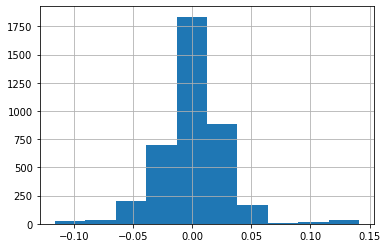

In [28]:
corr_rx_sr.hist()

In [ ]:
corr_tx_sr = full_df.corrwith(full_df['TX_PORT'])
corr_tx_sr = corr_tx_sr[(corr_tx_sr.isna()==False) & (corr_tx_sr!=1)]

corr_tx_sr.sort_values(ascending=False,inplace=True)
corr_tx_sr.head()

ict0_1417033    0.081723
ict0_1417038    0.072257
ict2_1325354    0.042008
ict1_1287531    0.036214
ict1_1280672    0.036167
dtype: float64

In [ ]:
(corr_tx_sr<0.025).mean()

0.9396728016359919

Text(0.5, 1.0, 'Corr Distribution')

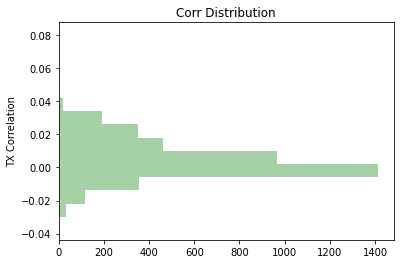

In [ ]:
sns.distplot(corr_tx_sr,bins=15,kde=False,color='forestgreen', axlabel='TX Correlation',vertical=True).set_title("Corr Distribution")

In [ ]:
target_sys

In [ ]:
full_df.plot.box(by="RX_GROUP")

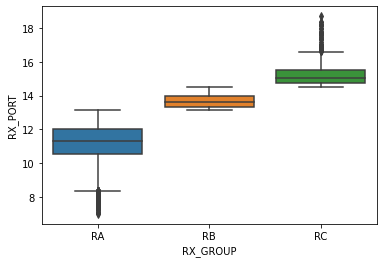

In [ ]:
sns.boxplot(x = full_df['RX_GROUP'] ,y=np.log(full_df['RX_PORT']))

In [ ]:
# sns.heatmap(np.round(full_df.corr(),2),annot=True)

# Done

## ic_t0

is there a clear column name mapping?


In [ ]:
ic_t0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Columns: 2017 entries, IC to 1249586
dtypes: float64(1506), int64(255), object(256)
memory usage: 63.2+ MB


In [ ]:
ic_t0.columns

Index(['IC', 'BIN', 'X', 'Y', '1249085', '1287499', '1281259', '1287500',
       '1281260', '1287501',
       ...
       '1352728', '1219183', '1219184', '1219185', '1261989', '1433135',
       '1433136', '1216387', '1319095', '1249586'],
      dtype='object', length=2017)

In [ ]:
ic_t0.describe().T

,count,mean,std,min,25%,50%,75%,max
BIN,4106.0,16.119338,1.003468,14.000000,16.000000,16.000000,16.000000,20.000000
X,4106.0,14.173648,7.212643,0.000000,8.000000,14.000000,20.000000,29.000000
Y,4106.0,11.427423,5.395511,0.000000,7.000000,12.000000,16.000000,22.000000
1287499,4106.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1281259,4106.0,0.000207,0.000017,0.000155,0.000197,0.000206,0.000216,0.000371
...,...,...,...,...,...,...,...,...
1261989,4106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1433135,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433136,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216387,4106.0,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [ ]:
ic_t0.duplicated().sum()

0

In [ ]:
ic_t0.shape

(4106, 2017)

In [ ]:
na_col_df = pd.DataFrame(ic_t0.isna().sum()[ic_t0.isna().sum()==4106])

In [ ]:
na_col_df.size

1057

In [ ]:
na_col_df.to_csv("/content/drive/MyDrive/Rans_IndustryProject_Nvidia/data/ict0_na_columns.csv",index=False)#header=['na_count'])#,'na_count'])#,index=False)

In [ ]:
na_col_df = pd.read_csv(r'/content/drive/MyDrive/Rans_IndustryProject_Nvidia/data/ict0_na_columns.csv')

In [ ]:
na_col_df.head()

,col_name,na_count
0,1261064,4106
1,1218097,4106
2,1318403,4106
3,1318404,4106
4,1318405,4106


In [ ]:
ic_t0.dropna(axis=1,how='all',inplace=True)

In [ ]:
ic_t0.shape

(4106, 960)

In [ ]:
ic_t0.dtypes

IC         object
BIN         int64
X           int64
Y           int64
1249085    object
            ...  
1219184     int64
1219185     int64
1261989     int64
1216387     int64
1249586    object
Length: 960, dtype: object

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = ic_t0.select_dtypes(include=numerics)
cat_df = ic_t0.select_dtypes(exclude=numerics)

In [ ]:
num_df.shape

(4106, 704)

In [ ]:
cat_df.shape

(4106, 256)

In [ ]:
cat_df.dtypes

IC         object
1249085    object
1287573    object
1287574    object
1287575    object
            ...  
1264516    object
1264517    object
1249517    object
1386894    object
1249586    object
Length: 256, dtype: object

In [ ]:
cat_df.columns

Index(['IC', '1249085', '1287573', '1287574', '1287575', '1249088', '1287577',
       '1287578', '1287579', '1249092',
       ...
       '1249514', '1264514', '1264515', '1249515', '1249516', '1264516',
       '1264517', '1249517', '1386894', '1249586'],
      dtype='object', length=256)

In [ ]:
for i in range(cat_df.shape[1]//5):
  display(cat_df.iloc[:3,i:i+5])
  print()

,IC,1249085,1287573,1287574,1287575
0,1384_0__012M9S,08/21/2020 4:15:52 PM,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count
1,1384_0__013M9S,08/21/2020 4:16:55 PM,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
2,1384_00_1_1M9S,08/21/2020 4:55:22 PM,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count


,1249085,1287573,1287574,1287575,1249088
0,08/21/2020 4:15:52 PM,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp
1,08/21/2020 4:16:55 PM,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
2,08/21/2020 4:55:22 PM,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287573,1287574,1287575,1249088,1287577
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,icmc.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,dps.dft.dft_ring_osc.m1clk_count
2,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count


,1287574,1287575,1249088,1287577,1287578
0,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,dps.dft.dft_ring_osc.m1clk_count,dps
2,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl


,1287575,1249088,1287577,1287578,1287579
0,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,icmc.dft.dft_ring_osc.m1clk_count,icmc,pxth.dft.dft_ring_osc.m1clk_count
1,rxs.dft.dft_ring_osc.m1clk_count,rxs,dps.dft.dft_ring_osc.m1clk_count,dps,rxt.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count


,1249088,1287577,1287578,1287579,1249092
0,pxdp,icmc.dft.dft_ring_osc.m1clk_count,icmc,pxth.dft.dft_ring_osc.m1clk_count,pxth
1,rxs,dps.dft.dft_ring_osc.m1clk_count,dps,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287577,1287578,1287579,1249092,1287581
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,pxth.dft.dft_ring_osc.m1clk_count,pxth,icmc.dft.dft_ring_osc.m1clk_count
1,dps.dft.dft_ring_osc.m1clk_count,dps,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count
2,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count


,1287578,1287579,1249092,1287581,1287582
0,icmc,pxth.dft.dft_ring_osc.m1clk_count,pxth,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,dps,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc


,1287579,1249092,1287581,1287582,1287583
0,pxth.dft.dft_ring_osc.m1clk_count,pxth,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count
1,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count


,1249092,1287581,1287582,1287583,1249096
0,pxth,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp
1,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287581,1287582,1287583,1249096,1287585
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,icmc.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,dps.dft.dft_ring_osc.m1clk_count
2,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count


,1287582,1287583,1249096,1287585,1287586
0,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,dps.dft.dft_ring_osc.m1clk_count,dps
2,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc


,1287583,1249096,1287585,1287586,1287587
0,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
1,rxt.dft.dft_ring_osc.m1clk_count,rxt,dps.dft.dft_ring_osc.m1clk_count,dps,rxt.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count


,1249096,1287585,1287586,1287587,1249100
0,pxdp,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
1,rxt,dps.dft.dft_ring_osc.m1clk_count,dps,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287585,1287586,1287587,1249100,1287589
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
1,dps.dft.dft_ring_osc.m1clk_count,dps,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count
2,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count


,1287586,1287587,1249100,1287589,1287590
0,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,dps,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl


,1287587,1249100,1287589,1287590,1287591
0,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count
1,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count


,1249100,1287589,1287590,1287591,1249104
0,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt
1,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
2,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287589,1287590,1287591,1249104,1287593
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
2,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count


,1287590,1287591,1249104,1287593,1287594
0,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc
1,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl


,1287591,1249104,1287593,1287594,1287595
0,rxt.dft.dft_ring_osc.m1clk_count,rxt,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc,irisc.g_dft_wrapper_ir.dft_ring_osc.m1clk_count
1,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count


,1249104,1287593,1287594,1287595,1249108
0,rxt,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc,irisc.g_dft_wrapper_ir.dft_ring_osc.m1clk_count,ir
1,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287593,1287594,1287595,1249108,1287597
0,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc,irisc.g_dft_wrapper_ir.dft_ring_osc.m1clk_count,ir,icmc.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count
2,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,tpt.dft.dft_ring_osc.m1clk_count


,1287594,1287595,1249108,1287597,1287598
0,qpc,irisc.g_dft_wrapper_ir.dft_ring_osc.m1clk_count,ir,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,tpt.dft.dft_ring_osc.m1clk_count,tpt


,1287595,1249108,1287597,1287598,1287599
0,irisc.g_dft_wrapper_ir.dft_ring_osc.m1clk_count,ir,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
1,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,tpt.dft.dft_ring_osc.m1clk_count,tpt,sxw.dft.dft_ring_osc.m1clk_count


,1249108,1287597,1287598,1287599,1249112
0,ir,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
1,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
2,sxw,tpt.dft.dft_ring_osc.m1clk_count,tpt,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287597,1287598,1287599,1249112,1287601
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,dps.dft.dft_ring_osc.m1clk_count
2,tpt.dft.dft_ring_osc.m1clk_count,tpt,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count


,1287598,1287599,1249112,1287601,1287602
0,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc
1,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,dps.dft.dft_ring_osc.m1clk_count,dps
2,tpt,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc


,1287599,1249112,1287601,1287602,1287603
0,rxs.dft.dft_ring_osc.m1clk_count,rxs,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc,rxs.dft.dft_ring_osc.m1clk_count
1,rxs.dft.dft_ring_osc.m1clk_count,rxs,dps.dft.dft_ring_osc.m1clk_count,dps,rxs.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count


,1249112,1287601,1287602,1287603,1249116
0,rxs,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc,rxs.dft.dft_ring_osc.m1clk_count,rxs
1,rxs,dps.dft.dft_ring_osc.m1clk_count,dps,rxs.dft.dft_ring_osc.m1clk_count,rxs
2,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287601,1287602,1287603,1249116,1287605
0,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count,qpc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
1,dps.dft.dft_ring_osc.m1clk_count,dps,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
2,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count


,1287602,1287603,1249116,1287605,1287606
0,qpc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,dps,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc


,1287603,1249116,1287605,1287606,1287607
0,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count
1,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count


,1249116,1287605,1287606,1287607,1249120
0,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp
1,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287605,1287606,1287607,1249120,1287609
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,port.link.llu_rx.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,port.link.llu_rx.dft.dft_ring_osc.m1clk_count
2,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count


,1287606,1287607,1249120,1287609,1287610
0,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu
1,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu
2,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc


,1287607,1249120,1287609,1287610,1287611
0,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu,rxs.dft.dft_ring_osc.m1clk_count
1,rxt.dft.dft_ring_osc.m1clk_count,rxt,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu,ptb.g_dft_wrapper.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count


,1249120,1287609,1287610,1287611,1249124
0,pxdp,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu,rxs.dft.dft_ring_osc.m1clk_count,rxs
1,rxt,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu,ptb.g_dft_wrapper.dft_ring_osc.m1clk_count,ptb
2,sxw,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287609,1287610,1287611,1249124,1287613
0,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
1,port.link.llu_rx.dft.dft_ring_osc.m1clk_count,llu,ptb.g_dft_wrapper.dft_ring_osc.m1clk_count,ptb,icmc.dft.dft_ring_osc.m1clk_count
2,rxw.dft.dft_ring_osc.m1clk_count,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count


,1287610,1287611,1249124,1287613,1287614
0,llu,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,llu,ptb.g_dft_wrapper.dft_ring_osc.m1clk_count,ptb,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,rxwc,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl


,1287611,1249124,1287613,1287614,1287615
0,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
1,ptb.g_dft_wrapper.dft_ring_osc.m1clk_count,ptb,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxp.dft.dft_ring_osc.m1clk_count


,1249124,1287613,1287614,1287615,1249128
0,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
1,ptb,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
2,sxw,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxp.dft.dft_ring_osc.m1clk_count,sxp


,1287613,1287614,1287615,1249128,1287617
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
2,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxp.dft.dft_ring_osc.m1clk_count,sxp,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count


,1287614,1287615,1249128,1287617,1287618
0,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,pxtl,sxp.dft.dft_ring_osc.m1clk_count,sxp,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl


,1287615,1249128,1287617,1287618,1287619
0,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count
1,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count
2,sxp.dft.dft_ring_osc.m1clk_count,sxp,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count


,1249128,1287617,1287618,1287619,1249132
0,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs
1,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxp,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287617,1287618,1287619,1249132,1287621
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count
2,pcore_top.pcore.pxtl.dft.dft_ring_osc.m1clk_count,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count


,1287618,1287619,1249132,1287621,1287622
0,icmc,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc
1,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc
2,pxtl,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc


,1287619,1249132,1287621,1287622,1287623
0,rxs.dft.dft_ring_osc.m1clk_count,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count
1,rxt.dft.dft_ring_osc.m1clk_count,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count
2,sxw.dft.dft_ring_osc.m1clk_count,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count


,1249132,1287621,1287622,1287623,1249136
0,rxs,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp
1,rxt,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt
2,sxw,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw


,1287621,1287622,1287623,1249136,1287625
0,icmc.dft.dft_ring_osc.m1clk_count,icmc,pcore_top.pcore.pxdp.dft.dft_ring_osc.m1clk_count,pxdp,qpc.qpc_logic.dft.dft_ring_osc.m1clk_count
1,icmc.dft.dft_ring_osc.m1clk_count,icmc,rxt.dft.dft_ring_osc.m1clk_count,rxt,dps.dft.dft_ring_osc.m1clk_count
2,icmc.dft.dft_ring_osc.m1clk_count,icmc,sxw.dft.dft_ring_osc.m1clk_count,sxw,psarx1.dft.dft_ring_osc.m1clk_count


In [ ]:
ic_t0.isnu

In [ ]:
(ic_t0.dtypes==np.int64).sum()

255

In [ ]:
(ic_t0.dtypes==object).sum()

256

In [ ]:
for i in range(ic_t0.columns.size//50):
  print(ic_t0.columns[i:i+50])

Index(['1384_0__012M9S', '20', '0', '12', '08/21/2020 4:15:52 PM', '1',
       '0.000240679', '1.1', '0.00013112', '1.2', '0.000415698', '0.000389903',
       '0.000411426', '0.000411578', '0.000408778', '0.00040842', '1.3',
       '0.000112649', '0.000231218', '1.4', '-9.42237E-6', '-1.56785E-5',
       '1.5', '0.000515331', '1.6', '0.0001354', '0.000124055', '1.7',
       '0.000116921', '1.8', '-1.86922E-6', '2.0218E-6', '1.9', '0.000482797',
       '1.10', '0.0010099', '1.11', '0.0450624', '0.000342205', '0.00034091',
       '0.000320457', '0.000329812', '0.000331866', '0.000326756',
       '0.000322628', '0.0003297', '0.000331102', '0.000331682', '0.000337698',
       '0.000325905'],
      dtype='object')
Index(['20', '0', '12', '08/21/2020 4:15:52 PM', '1', '0.000240679', '1.1',
       '0.00013112', '1.2', '0.000415698', '0.000389903', '0.000411426',
       '0.000411578', '0.000408778', '0.00040842', '1.3', '0.000112649',
       '0.000231218', '1.4', '-9.42237E-6', '-1.56785E-5', 

In [ ]:
ic_t0['08/21/2020 4:15:52 PM']

0       08/21/2020 4:16:55 PM
1       08/21/2020 4:55:22 PM
2       08/21/2020 4:40:56 PM
3       08/21/2020 6:21:30 PM
4       08/21/2020 4:36:33 PM
                ...          
4100    08/21/2020 2:24:28 PM
4101    08/21/2020 2:20:19 PM
4102    08/21/2020 2:16:39 PM
4103    08/21/2020 3:49:37 PM
4104    08/21/2020 2:35:17 PM
Name: 08/21/2020 4:15:52 PM, Length: 4105, dtype: object

In [ ]:
data = None
for chunk in pd.read_csv('/content/data/train_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [ ]:
date.to_csv("bosch_date_10k.csv",index=False)

In [ ]:
ttt.shape

(10000, 1157)

In [ ]:
ttt = pd.read_csv('/content/bosch_date_10k.csv')
ttt.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.26,82.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1618.72,1618.72,1618.72,1618.72,1618.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.22,1149.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.66,602.66,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
date.shape

(10000, 1157)

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1157 entries, Id to L3_S51_D4263
dtypes: float64(1156), int64(1)
memory usage: 88.3 MB


In [ ]:
date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.26,82.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1618.72,1618.72,1618.72,1618.72,1618.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.22,1149.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.66,602.66,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_F4126,L3_S45_F4128,L3_S45_F4130,L3_S45_F4132,L3_S47_F4138,L3_S47_F4143,L3_S47_F4148,L3_S47_F4153,L3_S47_F4158,L3_S47_F4163,L3_S47_F4168,L3_S47_F4173,L3_S47_F4178,L3_S47_F4183,L3_S47_F4188,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,0.061,0.233,0.233,0.167,0.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,0.621,0.049,-0.185,0.005,0.0,0.119,-0.288,0.044,NaN,NaN,-0.184,-0.028,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,-0.126,0.310,0.310,0.047,-0.100,-0.013,0.580,0.108,-0.260,-0.002,0.0,0.01,0.278,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_F4126,L3_S45_F4128,L3_S45_F4130,L3_S45_F4132,L3_S47_F4138,L3_S47_F4143,L3_S47_F4148,L3_S47_F4153,L3_S47_F4158,L3_S47_F4163,L3_S47_F4168,L3_S47_F4173,L3_S47_F4178,L3_S47_F4183,L3_S47_F4188,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,0.061,0.233,0.233,0.167,0.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,0.621,0.049,-0.185,0.005,0.0,0.119,-0.288,0.044,NaN,NaN,-0.184,-0.028,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,-0.126,0.310,0.310,0.047,-0.100,-0.013,0.580,0.108,-0.260,-0.002,0.0,0.01,0.278,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,L0_S2_F43,L0_S2_F45,L0_S2_F47,L0_S2_F49,L0_S2_F51,L0_S2_F53,L0_S2_F55,L0_S2_F57,L0_S2_F59,L0_S2_F61,L0_S2_F63,L0_S2_F65,L0_S2_F67,L0_S3_F69,L0_S3_F71,L0_S3_F73,L0_S3_F75,L0_S3_F77,L0_S3_F79,L0_S3_F81,L0_S3_F83,L0_S3_F85,L0_S3_F87,L0_S3_F89,L0_S3_F91,L0_S3_F93,L0_S3_F95,L0_S3_F97,L0_S3_F99,L0_S3_F101,...,L3_S47_F4162,L3_S47_F4164,L3_S47_F4166,L3_S47_F4167,L3_S47_F4169,L3_S47_F4171,L3_S47_F4172,L3_S47_F4174,L3_S47_F4176,L3_S47_F4177,L3_S47_F4179,L3_S47_F4181,L3_S47_F4182,L3_S47_F4184,L3_S47_F4186,L3_S47_F4187,L3_S47_F4189,L3_S47_F4191,L3_S47_F4192,L3_S49_F4207,L3_S49_F4209,L3_S49_F4210,L3_S49_F4212,L3_S49_F4214,L3_S49_F4215,L3_S49_F4217,L3_S49_F4219,L3_S49_F4220,L3_S49_F4222,L3_S49_F4224,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# FEATURE ENGINEERING

### The list of numeric features is selected based on the other XGBOOST classifier check the numericclassifier notebook

In [ ]:
num_feats = ['Id',
       'L3_S30_F3514', 'L0_S9_F200', 'L3_S29_F3430', 'L0_S11_F314',
       'L0_S0_F18', 'L3_S35_F3896', 'L0_S12_F350', 'L3_S36_F3918',
       'L0_S0_F20', 'L3_S30_F3684', 'L1_S24_F1632', 'L0_S2_F48',
       'L3_S29_F3345', 'L0_S18_F449', 'L0_S21_F497', 'L3_S29_F3433',
       'L3_S30_F3764', 'L0_S1_F24', 'L3_S30_F3554', 'L0_S11_F322',
       'L3_S30_F3564', 'L3_S29_F3327', 'L0_S2_F36', 'L0_S9_F180',
       'L3_S33_F3855', 'L0_S0_F4', 'L0_S21_F477', 'L0_S5_F114',
       'L0_S6_F122', 'L1_S24_F1122', 'L0_S9_F165', 'L0_S18_F439',
       'L1_S24_F1490', 'L0_S6_F132', 'L3_S29_F3379', 'L3_S29_F3336',
       'L0_S3_F80', 'L3_S30_F3749', 'L1_S24_F1763', 'L0_S10_F219',
 'Response']

In [ ]:
f_length = date.drop('Id', axis=1).count()
display(f_length[:5])
date_cols = f_length.reset_index().sort_values(by=0, ascending=False)
display(date_cols[:5])

L0_S0_D1    5733
L0_S0_D3    5733
L0_S0_D5    5733
L0_S0_D7    5733
L0_S0_D9    5733
dtype: int64

,index,0
1054,L3_S37_D3949,9473
1053,L3_S37_D3947,9473
1052,L3_S37_D3945,9473
1051,L3_S37_D3943,9473
1050,L3_S37_D3942,9473


In [ ]:
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
stations[:10]

['S0', 'S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17']

In [ ]:
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]

In [ ]:
date_cols.groupby('station')['index'].value_counts()

station  index     
S0       L0_S0_D1      1
         L0_S0_D11     1
         L0_S0_D13     1
         L0_S0_D15     1
         L0_S0_D17     1
                      ..
S9       L0_S9_D192    1
         L0_S9_D197    1
         L0_S9_D202    1
         L0_S9_D207    1
         L0_S9_D212    1
Name: index, Length: 1156, dtype: int64

In [ ]:
date_cols

,index,0,station
1054,L3_S37_D3949,9473,S37
1053,L3_S37_D3947,9473,S37
1052,L3_S37_D3945,9473,S37
1051,L3_S37_D3943,9473,S37
1050,L3_S37_D3942,9473,S37
...,...,...,...
1091,L3_S42_D4037,0,S42
1090,L3_S42_D4033,0,S42
1089,L3_S42_D4029,0,S42
302,L1_S24_D1158,0,S24


In [ ]:
date_cols.drop_duplicates('station', keep='first')['index'].tolist()

['L3_S37_D3949',
 'L3_S30_D3541',
 'L3_S29_D3428',
 'L3_S34_D3877',
 'L3_S33_D3870',
 'L0_S0_D3',
 'L0_S1_D30',
 'L0_S8_D145',
 'L3_S36_D3919',
 'L3_S35_D3910',
 'L0_S5_D115',
 'L0_S3_D70',
 'L0_S6_D120',
 'L0_S7_D143',
 'L0_S2_D54',
 'L0_S4_D106',
 'L0_S12_D333',
 'L0_S20_D465',
 'L0_S13_D355',
 'L0_S10_D266',
 'L0_S11_D284',
 'L0_S9_D192',
 'L2_S26_D3084',
 'L1_S24_D1828',
 'L0_S19_D457',
 'L0_S17_D432',
 'L0_S14_D380',
 'L0_S15_D401',
 'L0_S16_D428',
 'L2_S27_D3156',
 'L0_S18_D447',
 'L0_S21_D469',
 'L0_S23_D629',
 'L0_S22_D608',
 'L3_S41_D4021',
 'L3_S40_D3981',
 'L3_S45_D4129',
 'L3_S48_D4203',
 'L3_S47_D4155',
 'L3_S39_D3974',
 'L3_S51_D4255',
 'L1_S25_D1887',
 'L3_S31_D3848',
 'L3_S43_D4097',
 'L3_S49_D4208',
 'L3_S50_D4254',
 'L3_S44_D4122',
 'L3_S38_D3953',
 'L3_S32_D3852',
 'L2_S28_D3234',
 'L3_S46_D4135',
 'L3_S42_D4057']

In [ ]:
length = date.drop('Id', axis=1).count()
date_cols = length.reset_index().sort_values(by=0, ascending=False)
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()

In [ ]:
data = None
for chunk in pd.read_csv('/content/data/train_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [ ]:
data.head()

,Id,S0,S1,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S2,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S3,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S4,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S5,S50,S51,S6,S7,S8,S9,start_station,end_station
0,4,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
1,6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,42
2,7,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
3,9,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
4,11,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42


In [ ]:
int_stations =np.array([int(s[1:]) for s in stations])

In [ ]:
data.iloc[:,1:-2]*int_stations

,S0,S1,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S2,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S3,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S4,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S5,S50,S51,S6,S7,S8,S9
0,0,1,10,0,12,0,0,15,16,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,37,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,2,20,21,0,23,0,25,0,27,28,0,0,0,0,0,0,0,35,36,0,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,10,0,0,13,14,0,16,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,10,0,12,0,0,15,16,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,0,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,11,12,0,0,15,16,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,0,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,0,1,10,0,12,0,14,0,16,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,35,36,0,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1183743,0,0,0,0,0,0,0,0,0,0,0,0,2,20,0,22,23,0,0,26,27,0,29,0,0,0,0,0,0,35,36,0,0,39,4,0,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1183744,0,1,0,11,0,13,14,0,16,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,38,39,4,0,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1183745,0,1,0,11,12,0,0,15,16,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.array([int(s[1]) for s in data2.columns])

NameError: ignored

In [ ]:
data.iloc[:10000,:].to_csv("bosch_data_10.csv",index=False)

In [ ]:
data.shape

(1183747, 55)

In [ ]:
data2 = data.iloc[:10000,1:-1].copy()
ins_stations = np.array([int(s[1:]) for s in data2.columns])
data2=data2*ins_stations
data2.head()

ValueError: ignored

In [ ]:
data2.values.tolist()

[[0, 1, 10, 0, 12, 0, 0, 15, 16, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 20, 21, 0, 23, 0, 25],
 [0, 1, 10, 0, 0, 13, 14, 0, 16, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 10, 0, 12, 0, 0, 15, 16, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 11, 12, 0, 0, 15, 16, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 11, 12, 0, 0, 15, 16, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 20, 0, 22, 0, 24, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 10, 0, 12, 0, 0, 15, 16, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 20, 21, 0, 0, 24, 25],
 [0, 1, 10, 0, 12, 0, 0, 15, 16, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 11, 0, 13, 14, 0, 16, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 11, 12, 0, 0, 15, 16, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 10, 0, 12, 0, 14, 0, 16, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 10, 0, 0, 13, 14, 0, 16, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 10, 0, 12, 0, 0, 15, 16, 1

In [ ]:
arrays = data2.apply(np.array,axis=1)

In [ ]:
arrays = arrays.apply(np.unique)


In [ ]:
arrays

0     [0, 1, 10, 12, 15, 16, 19]
1         [0, 2, 20, 21, 23, 25]
2     [0, 1, 10, 13, 14, 16, 18]
3     [0, 1, 10, 12, 15, 16, 18]
4     [0, 1, 11, 12, 15, 16, 19]
5     [0, 1, 11, 12, 15, 16, 18]
6             [0, 2, 20, 22, 24]
7                            [0]
8     [0, 1, 10, 12, 15, 16, 18]
9         [0, 2, 20, 21, 24, 25]
10    [0, 1, 10, 12, 15, 16, 18]
11    [0, 1, 11, 13, 14, 16, 17]
12    [0, 1, 11, 12, 15, 16, 17]
13    [0, 1, 10, 12, 14, 16, 17]
14    [0, 1, 10, 13, 14, 16, 17]
15    [0, 1, 10, 12, 15, 16, 17]
16            [0, 2, 20, 21, 24]
17    [0, 1, 10, 13, 15, 16, 18]
18        [0, 2, 20, 22, 23, 25]
19    [0, 1, 11, 12, 14, 16, 18]
dtype: object

In [ ]:
plt.plot(arrays[3][arrays[3]!=0],"*")

TypeError: ignored

In [ ]:
new_data=data.iloc[:,-2:]
new_data.head()

,start_station,end_station
0,0,42
1,2,42
2,0,42
3,0,42
4,0,42


In [ ]:
station_path = data.iloc[:,1:-2]*int_stations
station_path.head()

,S0,S1,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S2,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S3,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S4,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S5,S50,S51,S6,S7,S8,S9
0,0,1,10,0,12,0,0,15,16,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,37,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,2,20,21,0,23,0,25,0,27,28,0,0,0,0,0,0,0,35,36,0,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,10,0,0,13,14,0,16,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,40,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,10,0,12,0,0,15,16,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,0,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,11,12,0,0,15,16,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,36,0,0,39,4,0,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
path_set = station_path[station_path!=0].T.apply(np.uniqe)

NameError: ignored

In [ ]:
ser1 = data.groupby(['start_station','end_station'])['Id'].value_counts()

In [ ]:
ser1

start_station  end_station  Id     
-1             -1           725        1
                            11549      1
                            17873      1
                            24623      1
                            24624      1
                                      ..
 44             9           2284250    1
                            2290009    1
                            2293188    1
                            2293189    1
                            2300126    1
Name: Id, Length: 1183747, dtype: int64

In [ ]:
data.head()

,Id,S0,S1,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S2,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S3,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S4,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S5,S50,S51,S6,S7,S8,S9,start_station,end_station
0,4,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
1,6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,42
2,7,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
3,9,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
4,11,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42


In [ ]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):
    
    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])
del chunk
gc.collect()   

In [ ]:
data = data[['Id','start_station','end_station']]
usefuldatefeatures = ['Id']+date_cols

In [ ]:
minmaxfeatures = None
for chunk in pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

In [ ]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

In [ ]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()

In [ ]:
cols = [['Id']+date_cols,num_feats]

In [ ]:
traindata = None
testdata = None

In [ ]:
trainfiles = ['train_date.csv.zip','train_numeric.csv.zip']
testfiles = ['test_date.csv.zip','test_numeric.csv.zip']

In [ ]:
for i,f in enumerate(trainfiles):
    
    subset = None
    
    for chunk in pd.read_csv('../input/bosch-production-line-performance/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
    
    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")
        
del subset,chunk
gc.collect()
del cols[1][-1]

In [ ]:
for i, f in enumerate(testfiles):
    subset = None
    
    for chunk in pd.read_csv('../input/bosch-production-line-performance/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
        
    if testdata is None:
        testdata = subset.copy()
    else:
        testdata = pd.merge(testdata, subset.copy(), on="Id")
    
del subset,chunk
gc.collect()

In [ ]:
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')
testdata = testdata.merge(minmaxfeatures, on='Id')
testdata = testdata.merge(data, on='Id')

In [ ]:
del minmaxfeatures,data
gc.collect()

In [ ]:
train = traindata[::2]
valid = traindata[1::2]

In [ ]:
del traindata
gc.collect()

In [ ]:
def mcc(tp, tn, fp, fn):
    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if den == 0:
        return 0
    else:
        return num / np.sqrt(den)

In [ ]:
def eval_mcc(y_true, y_prob):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) 
    numn = n - nump 
    tp,fp = nump,numn
    tn,fn = 0.0,0.0
    best_mcc = 0.0
    best_id = -1
    mccs = np.zeros(n)
    for i in range(n):
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
        new_mcc = mcc(tp, tn, fp, fn)
        mccs[i] = new_mcc
        if new_mcc >= best_mcc:
            best_mcc = new_mcc
            best_id = i
    return best_mcc

In [ ]:
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'MCC', best_mcc

# MODELLING

In [ ]:
import xgboost as xgb
params = {'objective':"binary:logistic",
          'max_depth':25,
          'base_score':0.005,
          'eval_metric':'auc',
          'n_jobs':-1
}

In [ ]:
trainm = xgb.DMatrix(train.drop(['Response','Id'],axis=1),train['Response'])
validm = xgb.DMatrix(valid.drop(['Response','Id'],axis=1),valid['Response'])

test = xgb.DMatrix(testdata.drop(['Id'],axis=1))

In [ ]:
#del train,valid,testdata
#gc.collect()

In [ ]:
watchlist = [(trainm, 'train'), (validm, 'val')]
clf = xgb.train(params, trainm,
                num_boost_round=100,
                evals=watchlist,
                early_stopping_rounds=20,
                feval=mcc_eval,
                maximize=True
                )

[0]	train-auc:0.95180	val-auc:0.87291	train-MCC:0.31795	val-MCC:0.28061
Multiple eval metrics have been passed: 'val-MCC' will be used for early stopping.

Will train until val-MCC hasn't improved in 20 rounds.
[1]	train-auc:0.86988	val-auc:0.78568	train-MCC:0.33085	val-MCC:0.26641
[2]	train-auc:0.85854	val-auc:0.76640	train-MCC:0.30404	val-MCC:0.19033
[3]	train-auc:0.95343	val-auc:0.84072	train-MCC:0.39903	val-MCC:0.21786
[4]	train-auc:0.95719	val-auc:0.84205	train-MCC:0.48053	val-MCC:0.23077
[5]	train-auc:0.96318	val-auc:0.84587	train-MCC:0.54135	val-MCC:0.23908
[6]	train-auc:0.96737	val-auc:0.84620	train-MCC:0.64790	val-MCC:0.25339
[7]	train-auc:0.96920	val-auc:0.84561	train-MCC:0.70495	val-MCC:0.27464
[8]	train-auc:0.97016	val-auc:0.84602	train-MCC:0.73993	val-MCC:0.28269
[9]	train-auc:0.97231	val-auc:0.84541	train-MCC:0.78215	val-MCC:0.28642
[10]	train-auc:0.97358	val-auc:0.84617	train-MCC:0.81478	val-MCC:0.28762
[11]	train-auc:0.98200	val-auc:0.85118	train-MCC:0.84855	val-MCC:0.2

In [ ]:
predictions = clf.predict(validm)

0.35000000000000003
0.3546932387841169


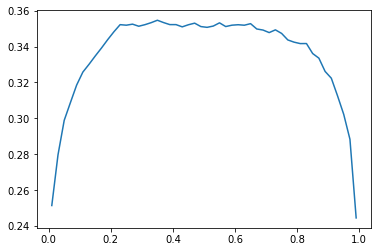

In [ ]:
from sklearn.metrics import matthews_corrcoef
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(valid.Response, predictions>threshold) for threshold in thresholds])

plt.plot(thresholds, mcc)
best_prob = thresholds[mcc.argmax()]
best_prob

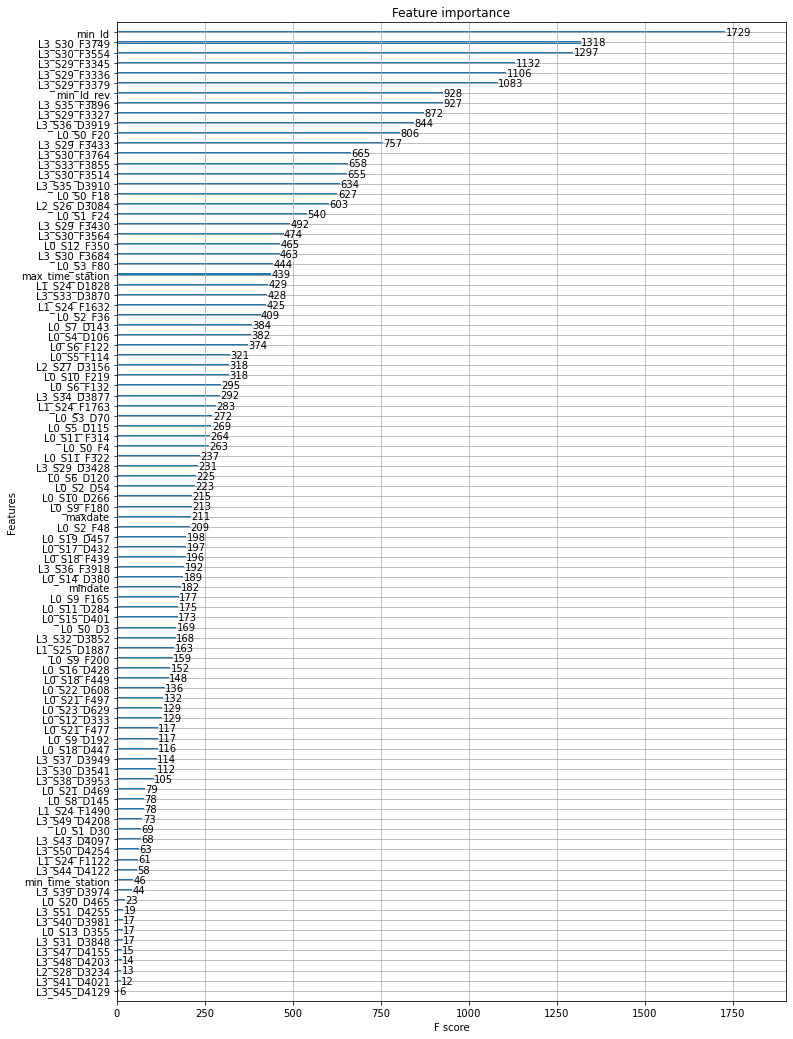

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf,ax=ax)

In [ ]:
test = clf.predict(test)

In [ ]:
testdata['Response'] = (test>best_prob).astype(int)
testdata[['Id','Response']].to_csv("submitwoId.csv",index=False)

In [ ]:
!gzip submitwoId.csv